In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Construct a tf.data.Dataset
from tensorflow.keras.datasets import fashion_mnist
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
def show_img(index):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(train_data[index], cmap=plt.cm.binary)
    plt.title(f"Label: {class_names[train_labels[index]]}")
    plt.axis('off')
    plt.show() 

In [5]:
def plot_random():
    plt.figure(figsize=(4, 4))
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        rand_index = random.choice(range(len(train_data)))
        plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
        plt.title(f"Label: {class_names[train_labels[rand_index]]}")
        plt.axis('off')
    plt.show()

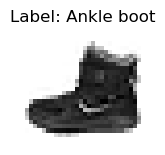

In [6]:
show_img(0)

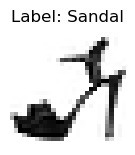

In [7]:
show_img(9)

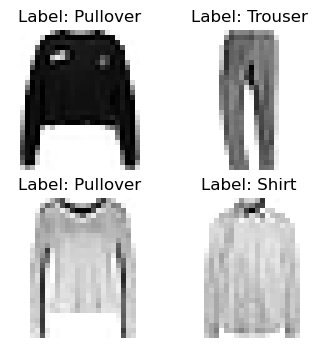

In [8]:
plot_random()

### Build a classification model
- Input shape - (28x28)
- Output shape - 10
- Loss function - Categorical Crossentropy
- Output activation - Softmax


In [9]:
model_one = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])
model_one.compile(optimizer="adam",loss ="sparse_categorical_crossentropy",metrics=["accuracy"])
non_norm_history = model_one.fit(train_data,
                                train_labels,
                                epochs=18,
                                validation_data=(test_data, test_labels),verbose=1)

Epoch 1/18
  45/1875 [..............................] - ETA: 2s - loss: 13.8952 - accuracy: 0.4840  

2023-12-06 20:07:17.447310: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 3s 1ms/step - loss: 1.0475 - accuracy: 0.7869 - val_loss: 0.5189 - val_accuracy: 0.8135
Epoch 2/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4480 - accuracy: 0.8427 - val_loss: 0.5705 - val_accuracy: 0.8177
Epoch 3/18
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4156 - accuracy: 0.8513 - val_loss: 0.4628 - val_accuracy: 0.8438
Epoch 4/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3867 - accuracy: 0.8627 - val_loss: 0.4013 - val_accuracy: 0.8590
Epoch 5/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3721 - accuracy: 0.8677 - val_loss: 0.4083 - val_accuracy: 0.8534
Epoch 6/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3509 - accuracy: 0.8737 - val_loss: 0.3877 - val_accuracy: 0.8694
Epoch 7/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3406 - accuracy: 0.8778 - val_loss: 0.3780 - val_accuracy: 0.8631
Epo

In [10]:
model_one.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trai

In [11]:
import pandas as pd
pd.DataFrame(non_norm_history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.047540,0.786917,0.518887,0.8135
1,0.448028,0.842733,0.570453,0.8177
2,0.415630,0.851333,0.462807,0.8438
3,0.386682,0.862700,0.401284,0.8590
4,0.372123,0.867683,0.408350,0.8534
5,0.350851,0.873683,0.387681,0.8694
6,0.340555,0.877850,0.378031,0.8631
7,0.329069,0.881617,0.416736,0.8432
8,0.321694,0.884617,0.391659,0.8649
9,0.306857,0.890000,0.361933,0.8766


<Axes: >

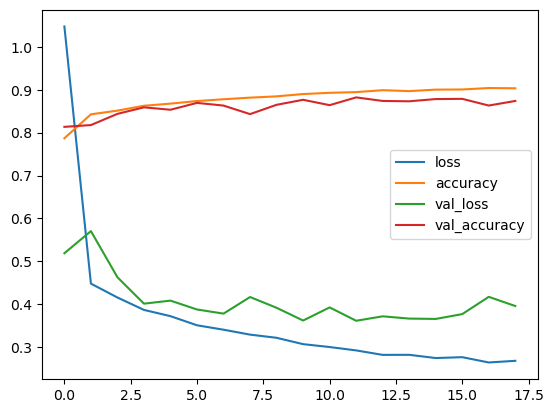

In [12]:
pd.DataFrame(non_norm_history.history).plot()

#### Pre-processing

In [13]:
train_data_norm = train_data/train_data.max()
test_data_norm = test_data/train_data.max()

In [14]:
# train the same model
model_two = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_two.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
norm_history = model_two.fit(train_data_norm,train_labels,epochs=18,validation_data=(test_data_norm, test_labels))

Epoch 1/18
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4885 - accuracy: 0.8227 - val_loss: 0.4136 - val_accuracy: 0.8508
Epoch 2/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3665 - accuracy: 0.8651 - val_loss: 0.4305 - val_accuracy: 0.8489
Epoch 3/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3322 - accuracy: 0.8774 - val_loss: 0.3751 - val_accuracy: 0.8627
Epoch 4/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3063 - accuracy: 0.8866 - val_loss: 0.3523 - val_accuracy: 0.8698
Epoch 5/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2899 - accuracy: 0.8922 - val_loss: 0.3614 - val_accuracy: 0.8719
Epoch 6/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2756 - accuracy: 0.8982 - val_loss: 0.3389 - val_accuracy: 0.8799
Epoch 7/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2634 - accuracy: 0.9014 - val_loss: 0.3324 - val_accuracy:

In [15]:
pd.DataFrame(norm_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.488489,0.822750,0.413614,0.8508
1,0.366502,0.865067,0.430502,0.8489
2,0.332188,0.877433,0.375072,0.8627
3,0.306318,0.886633,0.352346,0.8698
4,0.289898,0.892233,0.361416,0.8719
5,0.275625,0.898167,0.338929,0.8799
6,0.263411,0.901450,0.332398,0.8840
7,0.252525,0.904933,0.345778,0.8758
8,0.243200,0.908233,0.331101,0.8891
9,0.232711,0.912383,0.368652,0.8746


<Axes: >

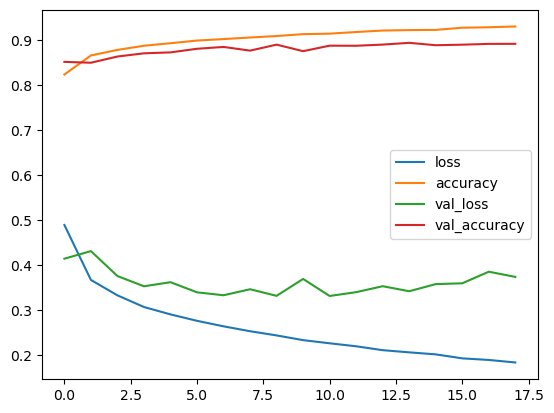

In [16]:
pd.DataFrame(norm_history.history).plot()

#### Finding the ideal learning rate !!!

In [17]:
# create the model
model_three = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"), 
])
# compile
model_three.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),metrics="accuracy")
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# fit the model
history_lr = model_three.fit(train_data_norm, train_labels, epochs=100, callbacks=[lr_scheduler],
                             validation_data=(test_data_norm,test_labels))


Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4923 - accuracy: 0.8210 - val_loss: 0.4322 - val_accuracy: 0.8441 - lr: 0.0010
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3774 - accuracy: 0.8615 - val_loss: 0.4021 - val_accuracy: 0.8572 - lr: 0.0011
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3440 - accuracy: 0.8748 - val_loss: 0.3732 - val_accuracy: 0.8673 - lr: 0.0013
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3264 - accuracy: 0.8800 - val_loss: 0.3710 - val_accuracy: 0.8677 - lr: 0.0014
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3150 - accuracy: 0.8847 - val_loss: 0.3534 - val_accuracy: 0.8746 - lr: 0.0016
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3035 - accuracy: 0.8885 - val_loss: 0.3597 - val_accuracy: 0.8705 - lr: 0.0018
Epoch 7/100
1875/1875 [=============================

1875/1875 [==============================] - 3s 1ms/step - loss: 2.3423 - accuracy: 0.0981 - val_loss: 2.3494 - val_accuracy: 0.1000 - lr: 0.3548
Epoch 53/100
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3494 - accuracy: 0.1001 - val_loss: 2.3556 - val_accuracy: 0.1000 - lr: 0.3981
Epoch 54/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3597 - accuracy: 0.0993 - val_loss: 2.3580 - val_accuracy: 0.1000 - lr: 0.4467
Epoch 55/100
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3594 - accuracy: 0.1011 - val_loss: 2.3375 - val_accuracy: 0.1000 - lr: 0.5012
Epoch 56/100
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3715 - accuracy: 0.1001 - val_loss: 2.3394 - val_accuracy: 0.1000 - lr: 0.5623
Epoch 57/100
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3748 - accuracy: 0.1007 - val_loss: 2.3631 - val_accuracy: 0.1000 - lr: 0.6310
Epoch 58/100
1875/1875 [==============================] - 3

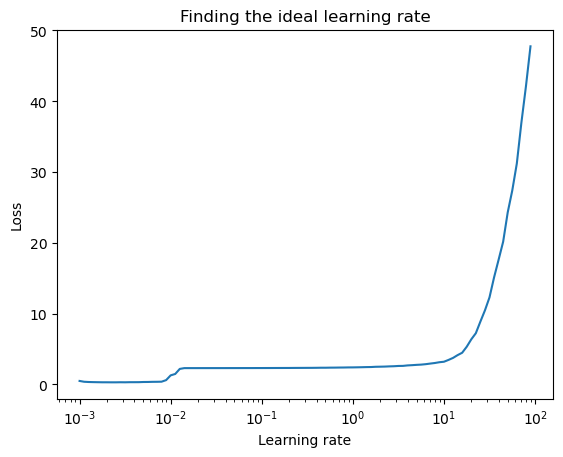

In [19]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(100)/20))
plt.semilogx(lrs, history_lr.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

**Ideal learning rate is 0.001 ie 1e-3**

### Evaluating our model

In [37]:
# train the different activation function
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
model_four = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, activation='LeakyReLU'),
#     BatchNormalization(),
    Dense(256, activation='LeakyReLU'),
#     BatchNormalization(),
    Dense(128, activation='LeakyReLU'),
#     BatchNormalization(),
    Dense(64, activation='LeakyReLU'),
#     BatchNormalization(),
    Dense(10, activation='softmax')
])
# compile
model_four.compile(loss="sparse_categorical_crossentropy",
                  optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
history_four = model_four.fit(train_data_norm,train_labels,epochs=20,
                              validation_data=(test_data_norm, test_labels),verbose=1)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5034 - accuracy: 0.8170 - val_loss: 0.4159 - val_accuracy: 0.8426
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3938 - accuracy: 0.8550 - val_loss: 0.4163 - val_accuracy: 0.8527
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3622 - accuracy: 0.8677 - val_loss: 0.3927 - val_accuracy: 0.8638
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3425 - accuracy: 0.8738 - val_loss: 0.3790 - val_accuracy: 0.8669
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3273 - accuracy: 0.8791 - val_loss: 0.3577 - val_accuracy: 0.8737
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3135 - accuracy: 0.8837 - val_loss: 0.3745 - val_accuracy: 0.8682
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3027 - accuracy: 0.8875 - val_loss: 0.3669 - val_accuracy:

In [38]:
pd.DataFrame(history_four.history)

,loss,accuracy,val_loss,val_accuracy
0,0.503447,0.816967,0.415886,0.8426
1,0.393758,0.855000,0.416343,0.8527
2,0.362170,0.867683,0.392738,0.8638
3,0.342536,0.873817,0.379012,0.8669
4,0.327322,0.879050,0.357740,0.8737
5,0.313521,0.883667,0.374504,0.8682
6,0.302722,0.887517,0.366878,0.8669
7,0.291834,0.891500,0.344035,0.8787
8,0.280527,0.895433,0.351151,0.8793
9,0.276419,0.896783,0.413448,0.8610


<Axes: >

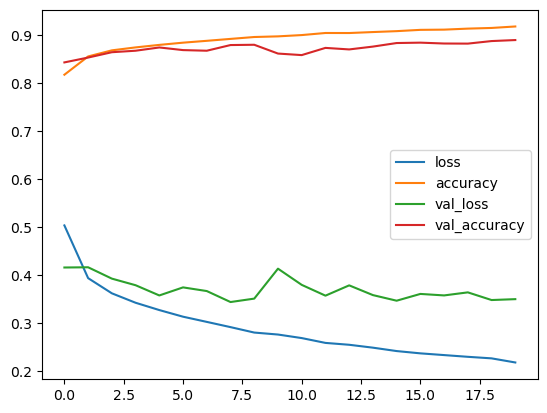

In [39]:
pd.DataFrame(history_four.history).plot()

In [42]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
def plot_confusion_matrix(model):
    predictions = np.argmax(model.predict(test_data_norm), axis=1)
    # Calculate the confusion matrix
    cm = confusion_matrix(test_labels, predictions)

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

313/313 [==============================] - 0s 579us/step


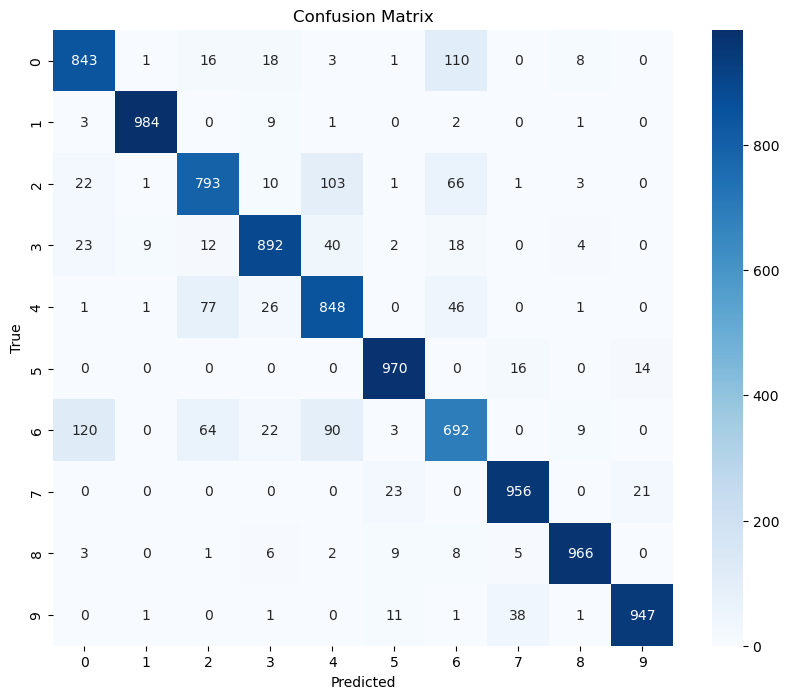

In [44]:
plot_confusion_matrix(model_four)